### LLaVA-NeXT model 

Questions on empiricism drawn from Wang & Feigenson (2019) original paper

Images from FG-NET dataset

In [1]:
questions_on_empiricism = [
    'Alex can see things with his eyes. When could Alex see with his eyes for the first time?',
    'When there is a sound close by, Alex can hear it. When could Alex hear sounds for the first time?',
    'When seeing a red flower and a blue flower, Alex can tell that they are different colors. Alex can tell colors apart. \
    When could Alex tell colors apart for the first time?',
    'When there is a car approaching, Alex can tell that the car is getting closer. Alex can tell what is near and what is far. \
    When could Alex tell near and far for the first time?',
    'When Alex sees someone hold an object and then drop it, Alex thinks the object will fall. Alex thinks objects will fall if we let go of them.\
     When could Alex think that for the first time?',
    'If Alex sees a toy being hidden in a box, he will think the object is still there even though he can no longer see it.\
     When could Alex think that for the first time?',
    'If Alex sees two cookies, one with 5 chocolate chips in it and one with 20 chocolate chips in it, he can tell which cookie has more chocolate chips without counting. \
     When could Alex tell which has more for the first time?',
    'If Alex sees a turtle that is upside down and struggling to get on its feet, he thinks that he should help the turtle. Alex thinks that helping is the right thing to do. \
    When could Alex think that for the first time?',
    'Alex can read books. When could Alex read for the first time? '
]

C:\Users\yh1242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Displaying newborn:


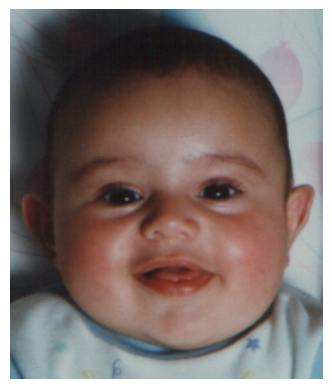

Displaying older_infant:


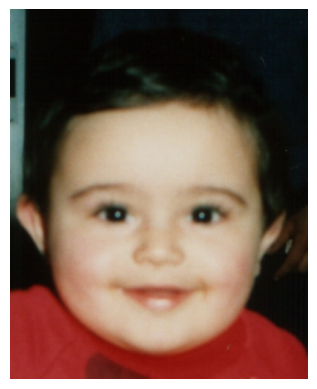

Displaying toddler:


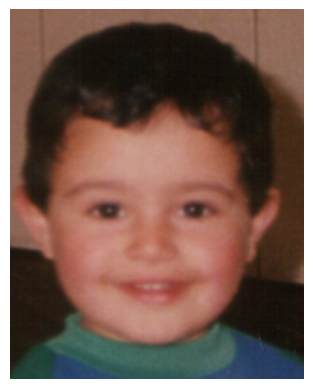

Displaying preschool_child:


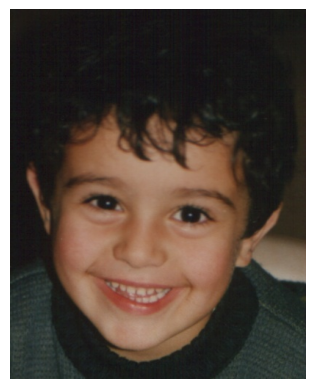

Displaying schoolage_child:


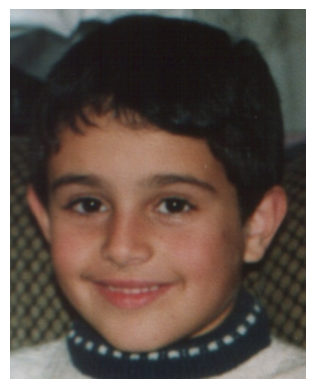

In [2]:
import kagglehub
import glob
from PIL import Image
import matplotlib.pyplot as plt

# FGNET age progression dataset from kaggle
path = kagglehub.dataset_download("aiolapo/fgnet-dataset")

age_paths = {'newborn': glob.glob(f"{path}/**/080A00.JPG", recursive=True)[0], "older_infant": glob.glob(f"{path}/**/080A01.JPG", recursive=True)[0],
            'toddler': glob.glob(f"{path}/**/080A02.JPG", recursive=True)[0], 'preschool_child': glob.glob(f"{path}/**/080A04.JPG", recursive=True)[0],
            'schoolage_child': glob.glob(f"{path}/**/080A07.JPG", recursive=True)[0]}

for age, img in age_paths.items():
  print(f"Displaying {age}:")
  img = Image.open(img)
  plt.imshow(img)
  plt.axis("off")
  plt.show()


In [ ]:
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="llava-hf/llava-1.5-13b-hf")

messages = [
    {
      "role": "user",
      "content": [
          {"type": "text", "text": 'toddler'},
           {"type": "text", "text": 'newborn'},
          {"type": "text", "text": 'schoolage_child'},
          {"type": "text", "text": f'{questions_on_empiricism[-1]} Pick from text 1, 2, 3. You must reply with one word'},
        ],
    },
]

out = pipe(text=messages, max_new_tokens=20)
out

Loading checkpoint shards: 100%|██████████| 6/6 [00:00<00:00, 43.37it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'input_text': [{'role': 'user',
    'content': [{'type': 'text', 'text': 'toddler'},
     {'type': 'text', 'text': 'newborn'},
     {'type': 'text', 'text': 'schoolage_child'},
     {'type': 'text',
      'text': 'Alex can read books. When could Alex read for the first time?  Pick from text 1, 2, 3. You must reply with one word'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text', 'text': 'toddler'},
     {'type': 'text', 'text': 'newborn'},
     {'type': 'text', 'text': 'schoolage_child'},
     {'type': 'text',
      'text': 'Alex can read books. When could Alex read for the first time?  Pick from text 1, 2, 3. You must reply with one word'}]},
   {'role': 'assistant', 'content': ' 1'}]}]

In [ ]:
from transformers import pipeline
#currently do not have enough gpu </3
pipe = pipeline("image-text-to-text", model="llava-hf/llava-1.5-13b-hf")

messages = [
    {
      "role": "user",
      "content": [
          {"type": "image", "url": age_paths['newborn']},
          {"type": "image", "url": age_paths['toddler']},
          {"type": "image", "url": age_paths['schoolage_child']},
          {"type": "text", "text": f'{questions_on_empiricism[0]} Pick from image 1, 2, 3. You must reply with one word.'},
        ],
    },
]

out = pipe(text=messages, max_new_tokens=20)

Loading checkpoint shards: 100%|██████████| 6/6 [00:01<00:00,  5.16it/s]
Device set to use cuda:0


OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.99 GiB of which 0 bytes is free. Of the allocated memory 37.90 GiB is allocated by PyTorch, and 5.53 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import requests
import torch
from transformers import AutoProcessor, LlavaNextForConditionalGeneration

# hugging face template 

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, device_map="auto")
processor = AutoProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

image_newborn = Image.open(age_paths['newborn'])
image_toddler = Image.open(age_paths['toddler'])
image_schoolage_child = Image.open(age_paths['schoolage_child'])

prompt = [
    f"[INST] {questions_on_empiricism[0]} Which of the following images show Alex at that age? <image>\n <image>\n <image>\n[/INST]"
]

inputs = processor(text=prompt, images=[image_newborn, image_toddler, 
                                    image_schoolage_child], padding=True, return_tensors="pt").to(model.device)

generate_ids = model.generate(**inputs, max_new_tokens=20)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)